In [44]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import math
import itertools
from mpl_toolkits.mplot3d import Axes3D
from mlrefined_libraries import math_optimization_library as optlib
static_plotter = optlib.static_plotter.Visualizer();


Problem 2.1:

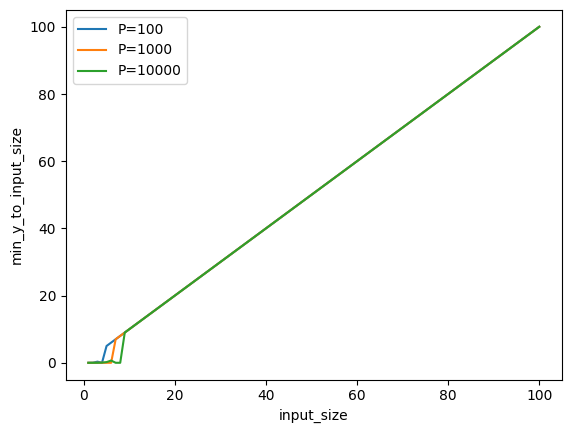

In [18]:
# 2.1(a) and (b)
N=100
P=[100,1000,10000]
min_x_set=np.arange(1,101)
min_y_set=[]
for p in P:
    min_y_set=[]
    for n in range(1,N+1):
        obs= math.floor(p ** (1 / n))
        x = np.linspace(-1, 1, obs)
        x = np.array([xx for xx in itertools.product(x, repeat=n)])
        y=np.sum(x**2,axis=1)
        min_y=np.min(y)
        min_y_set.append(min_y)
    plt.plot(min_x_set,min_y_set,label="P={}".format(p))
plt.xlabel("input_size")
plt.ylabel("min_y_to_input_size")
plt.legend()
plt.show()       
    

With the input size becomes bigger, the min of the function becomes more stable.

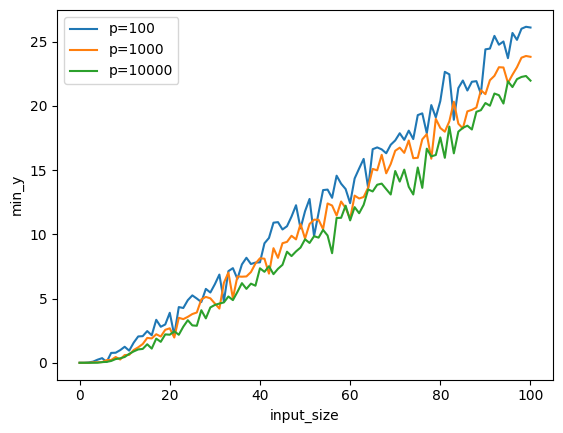

In [25]:
# 2.1 (c)
P=[100,1000,10000]
min_x_set=np.arange(0,101)
min_y_set=np.empty((len(min_x_set),len(P)))
for p_index, p in enumerate(P):
    for n in range(1,101):
        x=np.random.rand(p, n)*np.random.choice([-1,1],size=(p,n))
        y=np.sum(x ** 2, axis=1)
        min_y = np.min(y)
        min_y_set[n,p_index]=min_y

for p_index in range(len(P)):
    Y = min_y_set[:, p_index]
    X = min_x_set
    plt.plot(X, Y,label="p={}".format(P[p_index]))

plt.xlabel("input_size")
plt.ylabel("min_y")
plt.legend()

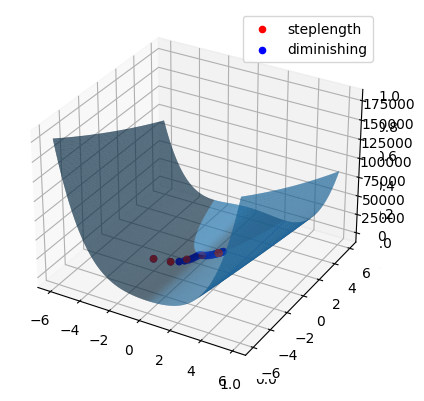

In [83]:
#2.4
def random_search(g,alpha_choice,max_its,w,num_samples):
    # run random search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):                    
        # record weights and cost evaluation
        if alpha_choice=="diminishing":
            alpha=1/float(k)
        else:
            alpha=alpha_choice
        weight_history.append(w)
        cost_history.append(g(w))
        
        # construct set of random unit directions
        dir=np.random.randn(num_samples,np.size(w))
        norms=np.sqrt(np.sum(dir*dir,axis=1))[:,np.newaxis]
        dir=dir/norms
        ### pick best descent direction
        w_candidates=w+alpha*dir
        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # check directions to ensure a real descent direction to take the step in its direction
        index=np.argmin(evals)
        if g(w_candidates[index])<g(w):
            d=dir[index,:]
            w=w+alpha*d      
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history
g = lambda w: 100*(w[1] - w[0]**2)**2 + (w[0] - 1)**2 
gg=lambda x,y:100*(y - x**2)**2 + (x - 1)**2 
alpha_choice = 1; w = np.array([-2,-2]); num_samples = 1000; max_its = 50
x1,cost_history_1 = random_search(g,alpha_choice,max_its,w,num_samples)
x2,cost_history_2 = random_search(g,"diminishing",max_its,w,num_samples)
XX1=[x[0] for x in x1]
YY1=[x[1] for x in x1]
XX2=[x[0] for x in x2]
YY2=[x[1] for x in x2]
fig = plt.figure()
ax = plt.axes(projection='3d')
xx = np.arange(-6,6,0.05)
yy = np.arange(-6,6,0.05)
xx,yy=np.meshgrid(xx,yy)
zz =gg(xx,yy)
#作图
ax = plt.axes(projection='3d')
ax.plot_trisurf(xx.flatten(), yy.flatten(), zz.flatten(), linewidth=0.2, antialiased=True) #flatten all the arrays here
ax.scatter3D(XX1,YY1,cost_history_1,color='r',label="steplength")
ax.scatter3D(XX2,YY2,cost_history_2,color='b',label="diminishing")
ax.legend()
plt.show()

The diminishing method has a more smooth line and the fixed steplength method has a more steep line but converges faster.

2.5
(a)Since the long side is $\sqrt{3}/2$, the corresponding central angle is $120$ degrees so the probability is $1/3$

(b)I guess it is $1/n$

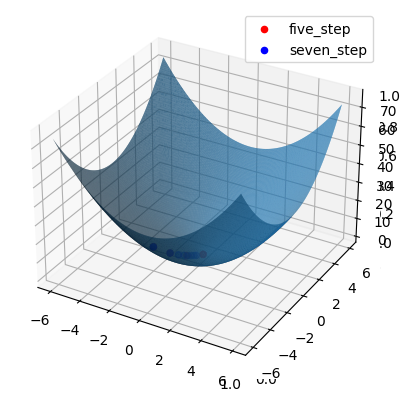

In [84]:
#2.8
g=lambda w:w[0]**2+w[1]**2+2
gg=lambda x,y:x**2+y**2+2
alpha_choice = 1; w = np.array([-2,-2]); num_samples = 1000; max_its = 5
x1,cost_history_1 = random_search(g,alpha_choice,max_its,w,num_samples)
x2,cost_history_2 = random_search(g,"diminishing",7,w,num_samples)
XX1=[x[0] for x in x1]
YY1=[x[1] for x in x1]
XX2=[x[0] for x in x2]
YY2=[x[1] for x in x2]
fig = plt.figure()
ax = plt.axes(projection='3d')
xx = np.arange(-6,6,0.05)
yy = np.arange(-6,6,0.05)
xx,yy=np.meshgrid(xx,yy)
zz =gg(xx,yy)
#作图
ax = plt.axes(projection='3d')
ax.plot_trisurf(xx.flatten(), yy.flatten(), zz.flatten(), linewidth=0.2, antialiased=True) #flatten all the arrays here
ax.scatter3D(XX1,YY1,cost_history_1,color='r',label="five_step")
ax.scatter3D(XX2,YY2,cost_history_2,color='b',label="seven_step")
ax.legend()
plt.show()